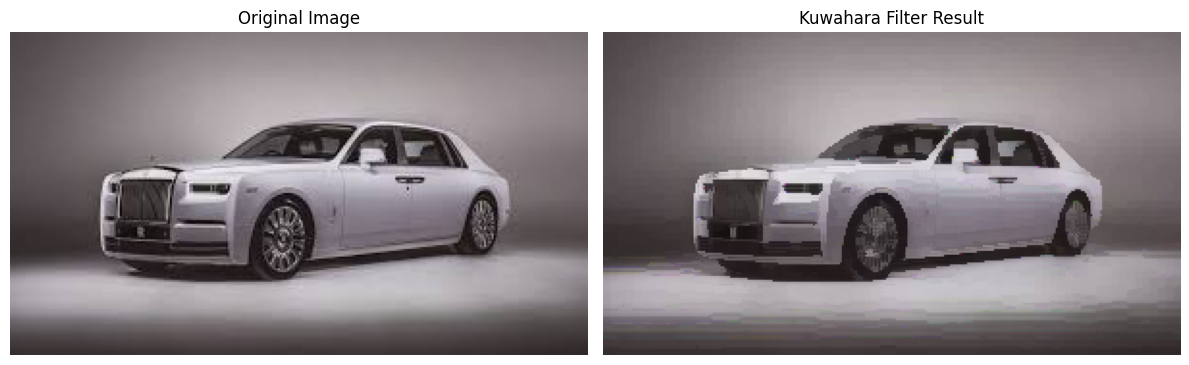

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def kuwahara_filter_color(image, window_size=5):
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    pad_size = window_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    height, width, channels = image.shape

    for c in range(channels):
        for i in range(height):
            for j in range(width):
                region = padded_image[i:i + window_size, j:j + window_size, c]
                q1 = region[:pad_size + 1, :pad_size + 1]
                q2 = region[:pad_size + 1, pad_size:]
                q3 = region[pad_size:, :pad_size + 1]
                q4 = region[pad_size:, pad_size:]
                means = [np.mean(q) for q in [q1, q2, q3, q4]]
                variances = [np.var(q) for q in [q1, q2, q3, q4]]
                min_var_index = np.argmin(variances)
                filtered_image[i, j, c] = means[min_var_index]
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image
image_path = '/content/1.jpeg'
original_image = Image.open(image_path).convert('RGB')
original_array = np.array(original_image)
kuwahara_result = kuwahara_filter_color(original_array, window_size=5)
kuwahara_image = Image.fromarray(kuwahara_result)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kuwahara_image)
plt.title('Kuwahara Filter Result')
plt.axis('off')

plt.tight_layout()
plt.show()


The **Kuwahara filter** is a non-linear image smoothing filter designed to reduce noise while preserving edges and details. It works by dividing a neighborhood around each pixel into four overlapping regions, calculating the variance in each region, and replacing the pixel value with the mean of the region with the lowest variance. This method smooths homogeneous areas without blurring edges, making it useful in applications like medical imaging, digital art, and texture analysis.

- **Preserves edges** while reducing noise.
- Divides pixel neighborhood into **four regions**.
- Replaces pixel value with the **mean of the least varied region**.